In [2]:
import rescomp as rc
import scipy as sp
import numpy as np
from scipy.interpolate import CubicSpline
from scipy import integrate 
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

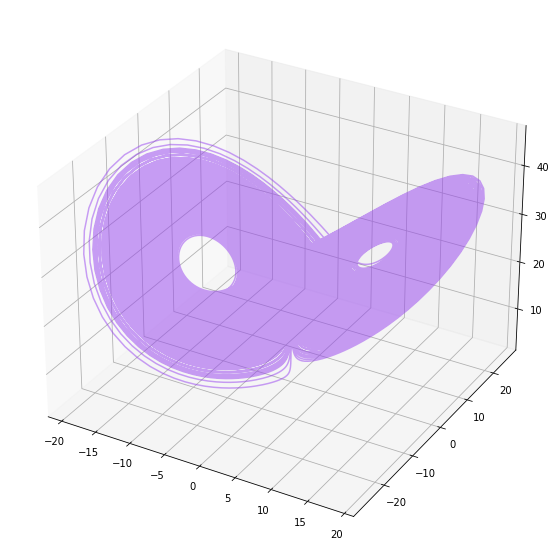

array([0.58879001, 0.25431122, 0.93908492])

In [3]:
t, U = rc.orbit("lorenz", duration=1000)
rc.plot3d(U)

In [3]:
def orbit_fft(U, t):
    T = float(t[-1] - t[0])
    N = len(t)
    Uf = sp.fft.fft(U, axis=0)/N
    Uf = 2*np.abs(Uf[1:int(N/2),:])
    xf = np.arange(1, int(N/2)) / T
    return Uf, xf

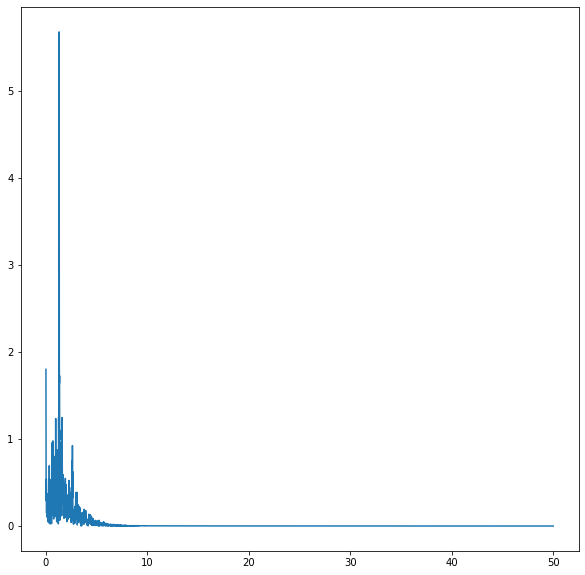

In [4]:
dt = np.mean(np.diff(t))
N = len(t)
Uf = sp.fft.fft(U, axis=0)/N
Uf = 2*np.abs(Uf[1:int(N/2),:])
xf = np.arange(1, int(N/2)) * dt
plt.plot(xf, Uf[:, 2])

In [5]:
Uf, xf = orbit_fft(U, t)

In [6]:
Uf.shape

(4999, 3)

In [7]:
uf = CubicSpline(xf, Uf)

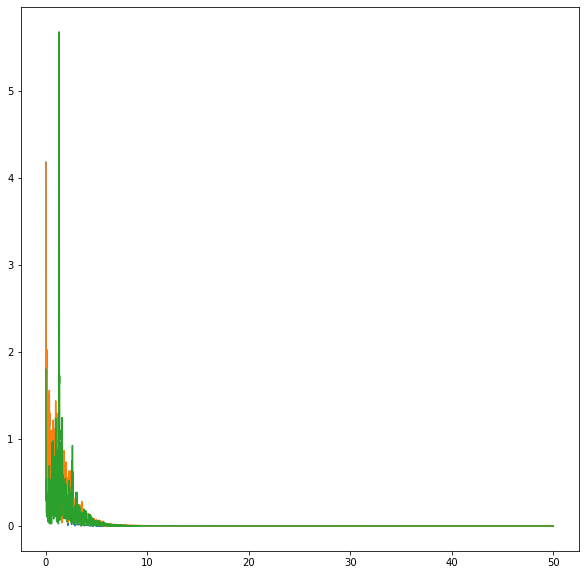

In [8]:
hz = np.linspace(0, 50, 1000)
plt.plot(xf, uf(xf))

In [9]:
uf(hz).shape

(1000, 3)

## Lorenz Fourier Norm

In [102]:
clip=True
t, U = rc.orbit("lorenz", duration=10000, trim=clip)
Uf, xf = orbit_fft(U, t)
uf = CubicSpline(xf, Uf)
hz = np.linspace(0, 50, 2000)

In [103]:
for T in [2, 5, 10, 50, 100, 1000, 2000, 3000, 4000, 5000]:
    st, sU = rc.orbit("lorenz", duration=T, trim=clip)
    sUf, sxf = orbit_fft(sU, st)
    suf = CubicSpline(sxf, sUf)
    diff = suf(hz) - uf(hz)
    L2 = np.mean(np.sum(diff**2, axis=0)**0.5)
    Linf = np.max(np.abs(diff))
    print(f"T: {T} L2: {L2} Linf: {Linf}")

T: 2 L2: 51.556473005292666 Linf: 17.080288311508035
T: 5 L2: 30.4738003516833 Linf: 8.979148836160395
T: 10 L2: 29.86468950108625 Linf: 19.377917752011918
T: 50 L2: 10.855190815357744 Linf: 5.179475971645984
T: 100 L2: 7.132733209960535 Linf: 4.164074845172693
T: 1000 L2: 2.4317174080617723 Linf: 1.9870980750145586
T: 2000 L2: 1.1186067429639779 Linf: 0.35774645349136913
T: 3000 L2: 0.8441925953336931 Linf: 0.29602161903964364
T: 4000 L2: 1.2928768999995832 Linf: 1.3863603019683537
T: 5000 L2: 0.666158280817791 Linf: 0.422566217341224


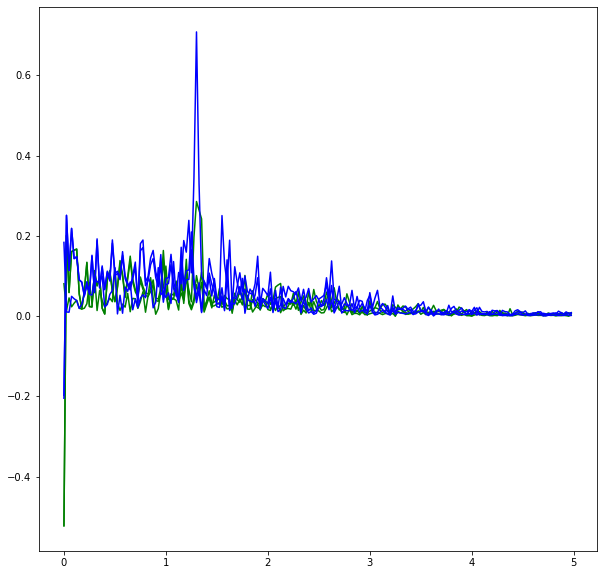

In [108]:
plt.plot(hz[:200], uf(hz[:200]), c="g")
plt.plot(hz[:200], suf(hz[:200]), c="b")

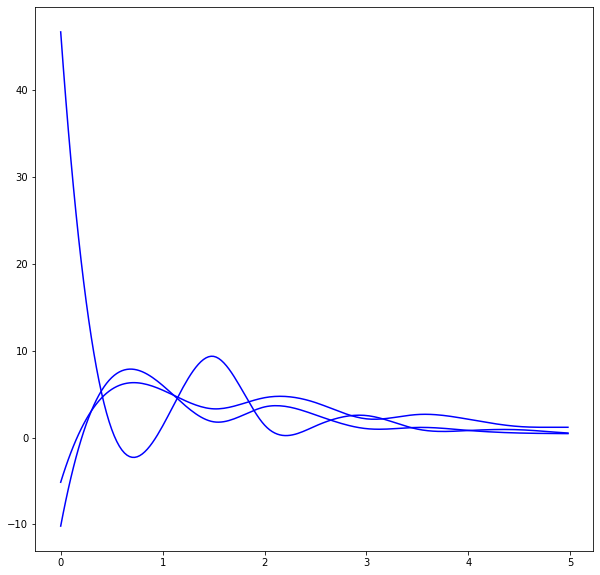

In [106]:
T = 2
st2, sU2 = rc.orbit("lorenz", duration=T, trim=clip)
sUf2, sxf2 = orbit_fft(sU2, st2)
suf2 = CubicSpline(sxf2, sUf2)
plt.plot(hz[:200], suf2(hz[:200]), c="b")

## Rossler Fourier Norm

In [109]:
clip=True
t, U = rc.orbit("rossler", duration=10000, trim=clip)
Uf, xf = orbit_fft(U, t)
uf = CubicSpline(xf, Uf)
hz = np.linspace(0, 50, 2000)

In [110]:
for T in [2, 5, 10, 50, 100, 1000, 2000, 3000, 4000, 5000]:
    st, sU = rc.orbit("rossler", duration=T, trim=clip)
    sUf, sxf = orbit_fft(sU, st)
    suf = CubicSpline(sxf, sUf)
    diff = suf(hz) - uf(hz)
    L2 = np.mean(np.sum(diff**2, axis=0)**0.5)
    Linf = np.max(np.abs(diff))
    print(f"T: {T} L2: {L2} Linf: {Linf}")

T: 2 L2: 15.534541777417294 Linf: 8.290466745581233
T: 5 L2: 33.8150009884751 Linf: 26.186311682480362
T: 10 L2: 22.426327160910873 Linf: 21.571062471420973
T: 50 L2: 5.30441370858559 Linf: 5.178705982020087
T: 100 L2: 3.702850562088571 Linf: 4.368383892820889
T: 1000 L2: 0.41675298475453104 Linf: 0.3030725125002382
T: 2000 L2: 0.3083646963492048 Linf: 0.20211850320581592
T: 3000 L2: 0.18657963422799065 Linf: 0.11230319079999673
T: 4000 L2: 0.10630418063364866 Linf: 0.07610207757496332
T: 5000 L2: 0.1383622274008128 Linf: 0.15116753795412574


## Thomas Fourier Norm

In [111]:
clip=True
t, U = rc.orbit("thomas", duration=100000, trim=clip, dt=0.1)
Uf, xf = orbit_fft(U, t)
uf = CubicSpline(xf, Uf)
hz = np.linspace(0, 50, 2000)

In [112]:
for T in [2, 5, 10, 50, 100, 1000, 2000, 3000, 4000, 5000]:
    st, sU = rc.orbit("thomas", duration=10*T, trim=clip, dt=0.1)
    sUf, sxf = orbit_fft(sU, st)
    suf = CubicSpline(sxf, sUf)
    diff = suf(hz) - uf(hz)
    L2 = np.mean(np.sum(diff**2, axis=0)**0.5)
    Linf = np.max(np.abs(diff))
    print(f"T: {T} L2: {L2} Linf: {Linf}")

T: 2 L2: 3695595033.4041405 Linf: 421119992.5929271
T: 5 L2: 3695595051.920915 Linf: 421119992.2724256
T: 10 L2: 3695594993.391681 Linf: 421120002.62922895
T: 50 L2: 3695591507.8096814 Linf: 421119771.9312746
T: 100 L2: 3695599309.644306 Linf: 421124466.64420325
T: 1000 L2: 3703481261.3308396 Linf: 421580921.28876686
T: 2000 L2: 3724642529.682281 Linf: 421458206.1312842
T: 3000 L2: 3614262654.1377225 Linf: 440751939.84932625
T: 4000 L2: 3654169120.864771 Linf: 433906386.07994103
T: 5000 L2: 3955149942.2689595 Linf: 483242546.62783986


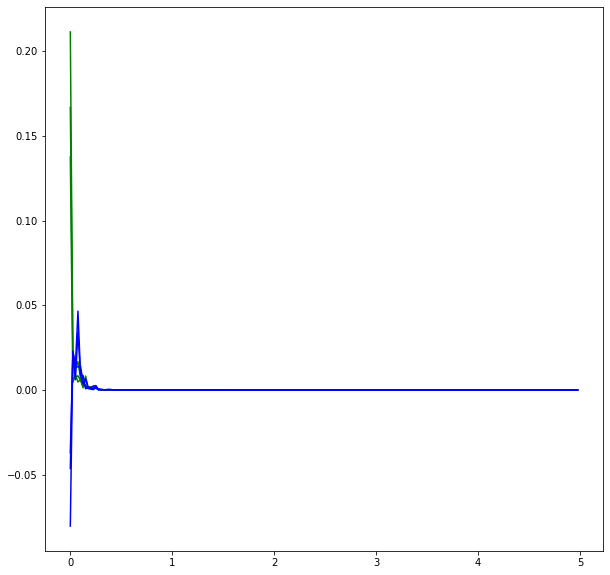

In [113]:
plt.plot(hz[:200], uf(hz[:200]), c="g")
plt.plot(hz[:200], suf(hz[:200]), c="b")


Try moving avg, or mean over many orbits

In [18]:
n = 100
clip=True
T = 10000
t, U = rc.orbit("lorenz", duration=T, trim=clip, dt=0.01)
Uf, xf = orbit_fft(U, t)
for i in range(n):
    t, U = rc.orbit("lorenz", duration=T, trim=clip, dt=0.01)
    Uf0, xf0 = orbit_fft(U, t)
    Uf += Uf0
Uf /= n


In [19]:
lorenz_spect = Uf.copy()

In [21]:
def moving_col_average(a, n=3) :
    ret = np.cumsum(a, dtype=float, axis=0)
    ret[n:, :] = ret[n:,:] - ret[:-n,:]
    return ret[n - 1:,:] / n

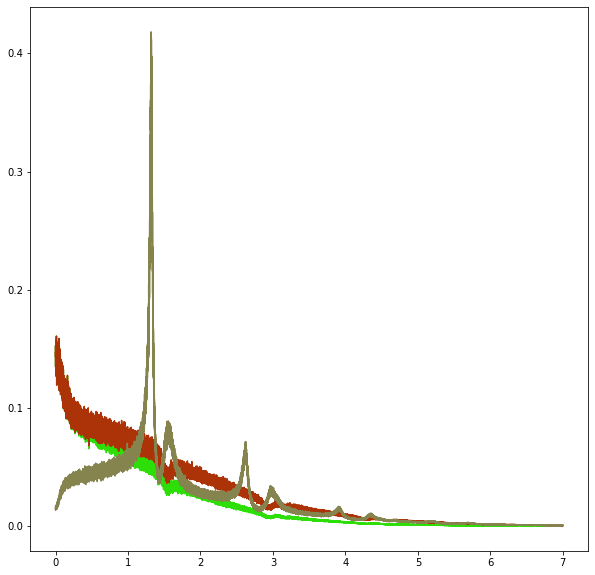

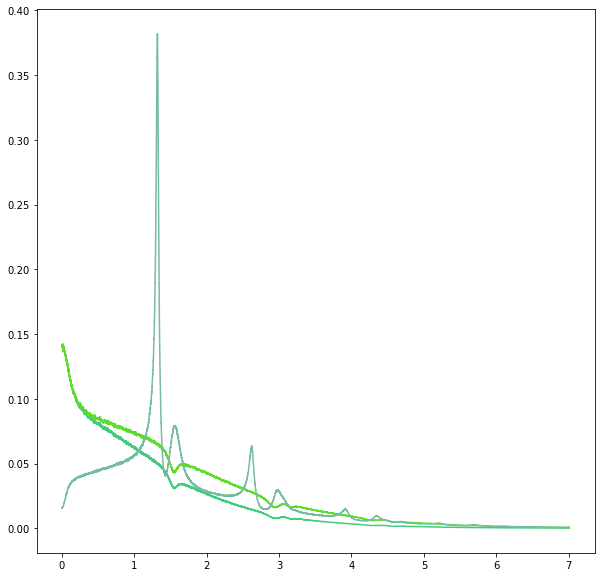

array([[0.25144384, 0.79660544, 0.49304962],
       [0.36666423, 0.86341427, 0.16505527],
       [0.46492109, 0.7327627 , 0.63048533]])

In [22]:
N = 70000
rc.plot2d(lorenz_spect[:N,:], xf[:N])
window = 50
smooth_lf = moving_col_average(lorenz_spect, n=window)
smooth_xf = xf[window - 1:]
rc.plot2d(smooth_lf[:N, :], smooth_xf[:N])

## Use Average Spectrum as Norm

In [27]:
t, U = rc.orbit("lorenz", duration=T, trim=clip, dt=0.01)
Uf, xf = orbit_fft(U, t)

In [46]:
meanuf = CubicSpline(xf, lorenz_spect)

In [49]:
for T in [2, 5, 10, 50, 100, 1000, 2000, 3000, 4000, 5000]:
    st, sU = rc.orbit("lorenz", duration=T, trim=clip)
    sUf, sxf = orbit_fft(sU, st)
    suf = CubicSpline(sxf, sUf)
    diff = suf(hz) - meanuf(hz)
    L2 = np.mean(np.sum(diff**2, axis=0)**0.5)
    Linf = np.max(np.abs(diff))
    print(f"T: {T} L2: {L2} Linf: {Linf}")

T: 2 L2: 81.08030976209852 Linf: 43.32172018926589
T: 5 L2: 45.70150194775395 Linf: 24.519899377551628
T: 10 L2: 23.63935060878606 Linf: 10.227329513433183
T: 50 L2: 16.231413485230686 Linf: 16.482162823663586
T: 100 L2: 8.79636643120135 Linf: 7.001980099083473
T: 1000 L2: 1.844590561440085 Linf: 0.8405481458754391
T: 2000 L2: 1.128478067830278 Linf: 0.5759308326237332
T: 3000 L2: 0.913045524701889 Linf: 0.5720016217238351
T: 4000 L2: 0.7469336944463301 Linf: 0.6091889500723981
T: 5000 L2: 0.4720964368107339 Linf: 0.2452377880894953


## Rolling average of mean as norm
(Not as good as the mean)

In [37]:
print(xf.shape)
print(lorenz_spect.shape)
print(smooth_lf.shape)

(499999,)
(499999, 3)
(499950, 3)


In [40]:
m, n = smooth_lf.shape
cat_smooth_lf = np.vstack((lorenz_spect[:window-1], smooth_lf))
meanuf = CubicSpline(xf, cat_smooth_lf)

(499999, 3)


In [44]:
for T in [2, 5, 10, 50, 100, 1000, 2000, 3000, 4000, 5000]:
    st, sU = rc.orbit("lorenz", duration=T, trim=clip)
    sUf, sxf = orbit_fft(sU, st)
    suf = CubicSpline(sxf, sUf)
    diff = suf(hz) - meanuf(hz)
    L2 = np.mean(np.sum(diff**2, axis=0)**0.5)
    Linf = np.max(np.abs(diff))
    print(f"T: {T} L2: {L2} Linf: {Linf}")

T: 2 L2: 53.62612564308257 Linf: 23.274347640439046
T: 5 L2: 64.36913384729667 Linf: 42.84451112533425
T: 10 L2: 25.747412817473077 Linf: 13.851003957450347
T: 50 L2: 10.863135597282215 Linf: 6.309029522308649
T: 100 L2: 7.324399328458724 Linf: 3.242198796538828
T: 1000 L2: 2.5730815645086866 Linf: 2.345309917706744
T: 2000 L2: 1.9759566798527881 Linf: 2.1463976513727356
T: 3000 L2: 0.8577635688875122 Linf: 0.3894155783747871
T: 4000 L2: 1.046911160265635 Linf: 1.0311568936419067
T: 5000 L2: 0.6216478513246374 Linf: 0.3171147309211839


## Mean Rossler Frequency Spectrum

In [6]:
n = 10
clip=True
T = 10000
t0, U0 = rc.orbit("rossler", duration=T, trim=clip, dt=0.01)
xf, meanUf = orbit_fft(t, U)
for i in range(n):
    t0, U0 = rc.orbit("lorenz", duration=T, trim=clip, dt=0.01)
    xf0, Uf0 = orbit_fft(t, U)
    meanUf += Uf0
meanUf /= n


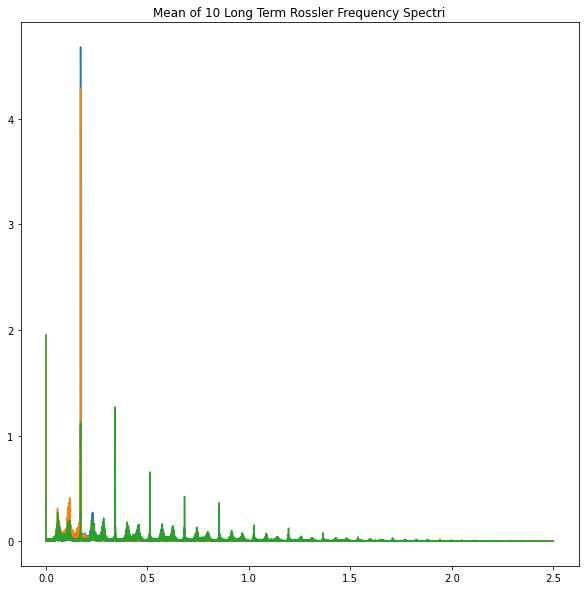

In [7]:
mask = (xf < 2.5)
plt.plot(xf[mask], meanUf[mask,:])
plt.title(f"Mean of {n} Long Term Rossler Frequency Spectri")
plt.show()

In [18]:
PRMS2 = {
    "res_sz": 100,
    "activ_f": np.tanh,
    "mean_degree": 1.5,
    "ridge_alpha": 1e-4,
    "spect_rad": 2.0,
    "gamma": 5.,
    "sigma": .05,
    "uniform_weights": True,
    "sparse_res": True,
    "signal_dim": 3
}

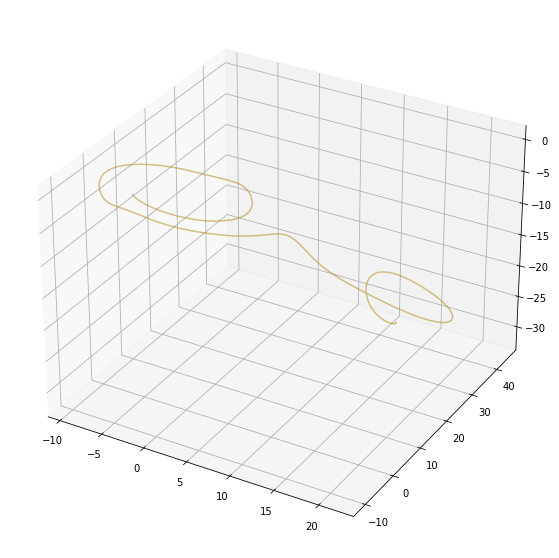

Fourier Norm:  345.627606760479


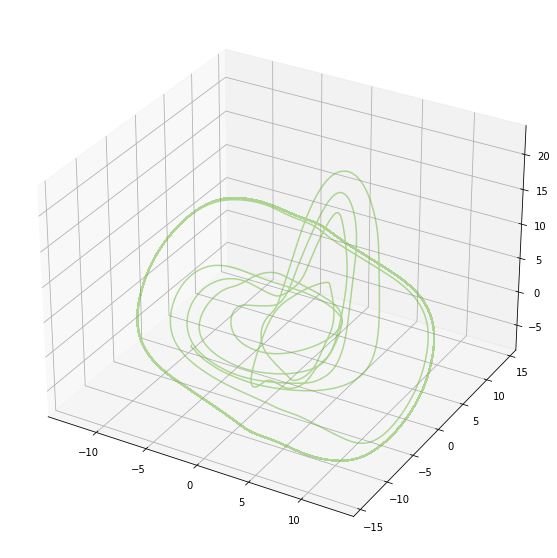

Fourier Norm:  977.2338612049165


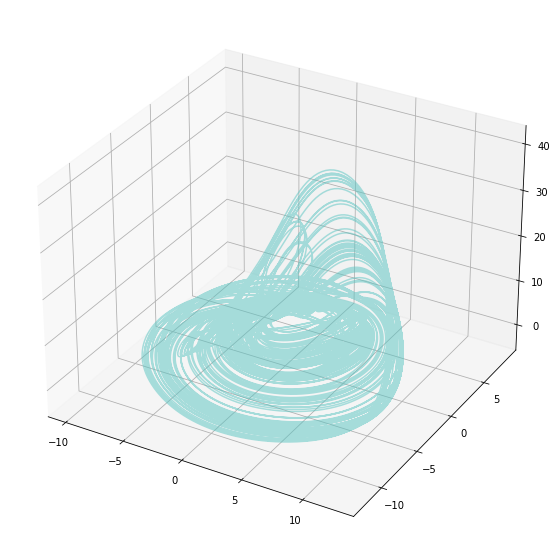

Fourier Norm:  523.3869200153973


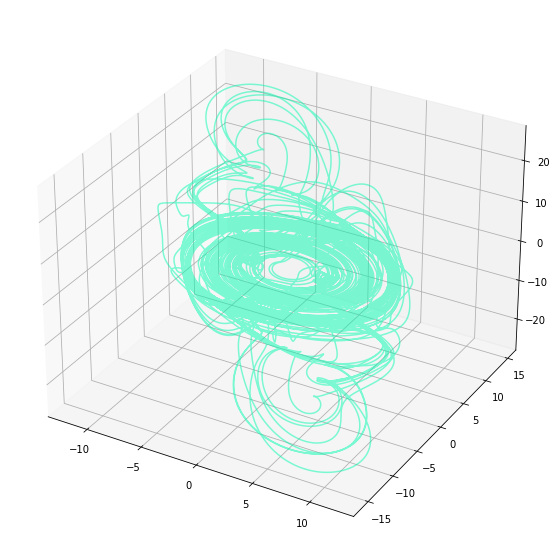

Fourier Norm:  594.9741116167742


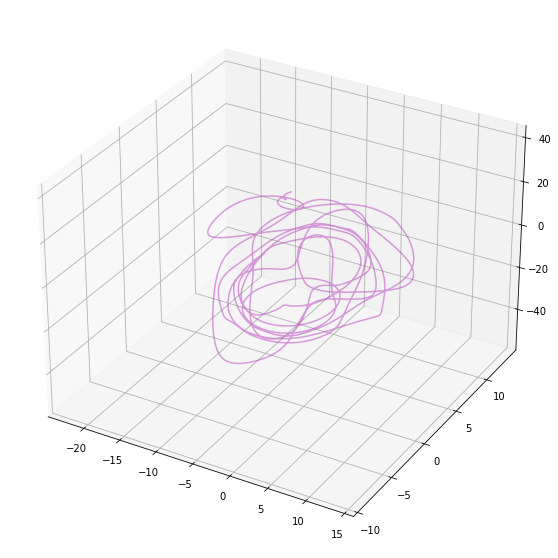

Fourier Norm:  255.1699543979986


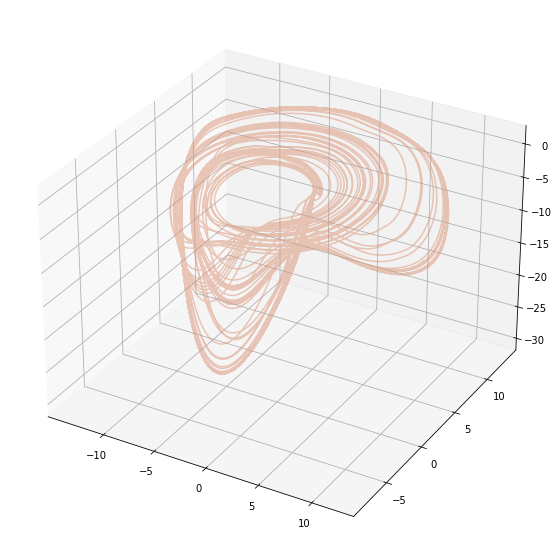

Fourier Norm:  693.0326741368472


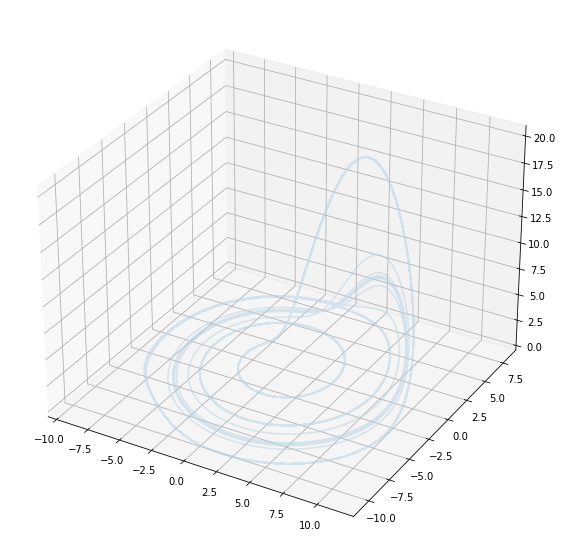

Fourier Norm:  502.24487607101264


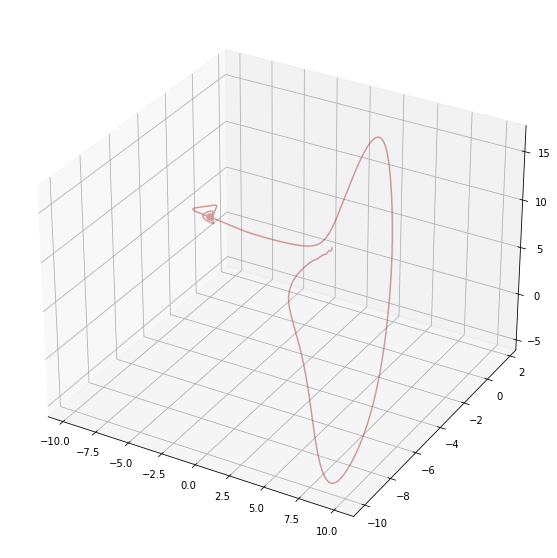

Fourier Norm:  55.00283046911208


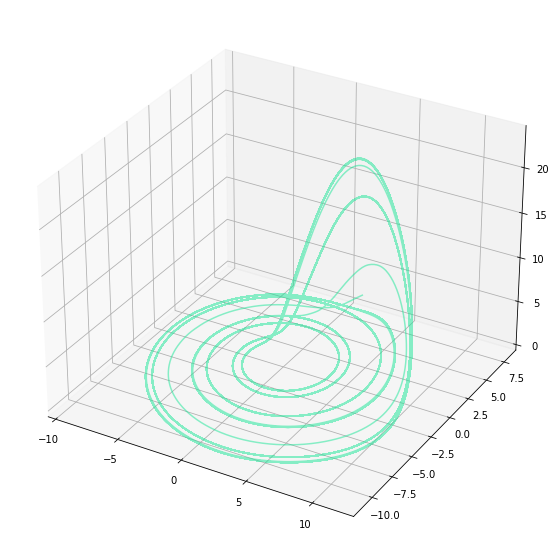

Fourier Norm:  533.5479437763643


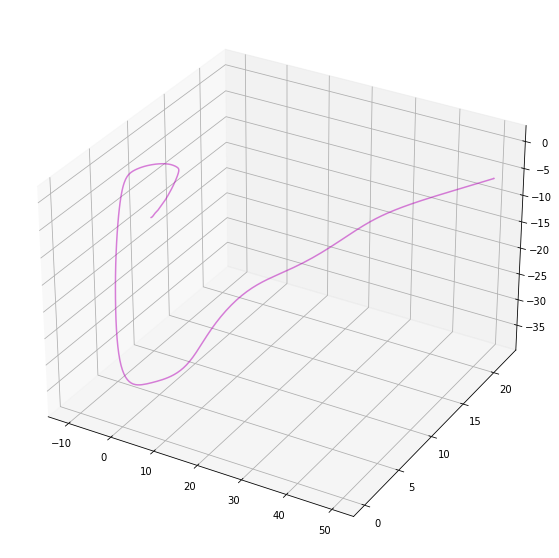

Fourier Norm:  182.7677013810571


In [19]:
for i in range(10):
    t, U = rc.orbit("rossler", duration=50, trim=True)
    xf0, Uf0 = orbit_fft(t, U)
    rcomp = rc.ResComp(**PRMS2)
    rcomp.train(t, U)
    u0 = U[0,:] + np.random.randn(3)*1e-4
    ts = np.arange(0, 1000, .01)
    pre = rcomp.predict(ts, u0)
    rc.plot3d(pre)
    xf0, Uf0 = orbit_fft(t, pre)
    print("Fourier Norm: ", fouriernorm(xf0, Uf0, xf, meanUf, order=2))

In [20]:
PRMS3 = {
    "res_sz": 100,
    "activ_f": np.tanh,
    "mean_degree": 1.5,
    "ridge_alpha": 1e-4,
    "spect_rad": 2.0,
    "gamma": 10.,
    "sigma": .15,
    "uniform_weights": True,
    "sparse_res": True,
    "signal_dim": 3
}

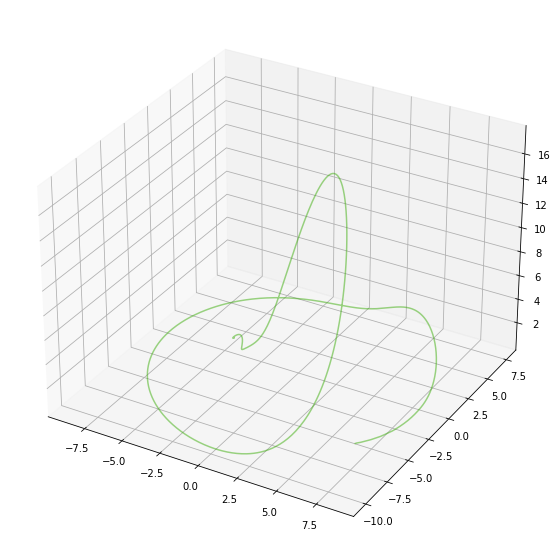

Fourier Norm:  57.0467612438649


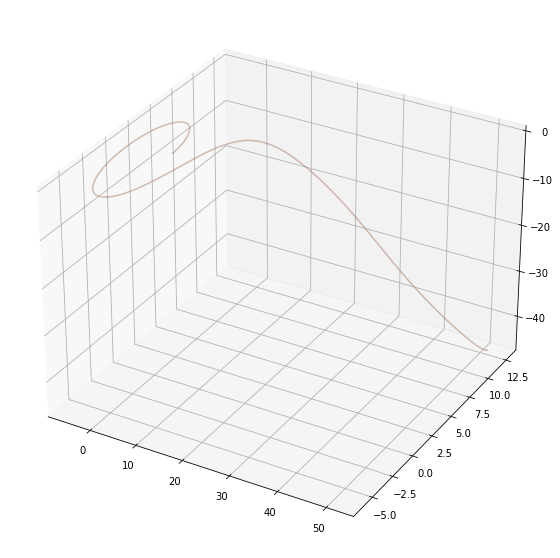

Fourier Norm:  370.17477554301985


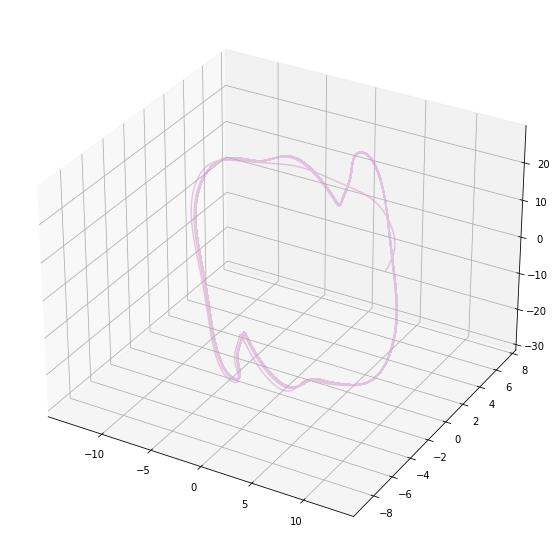

Fourier Norm:  1100.3539740146607


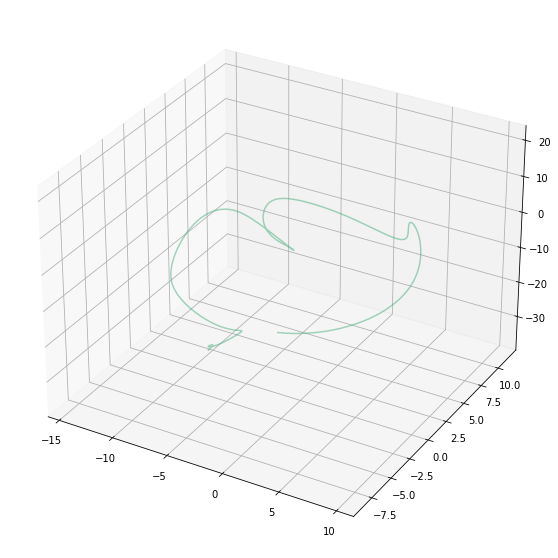

Fourier Norm:  136.2554060580105


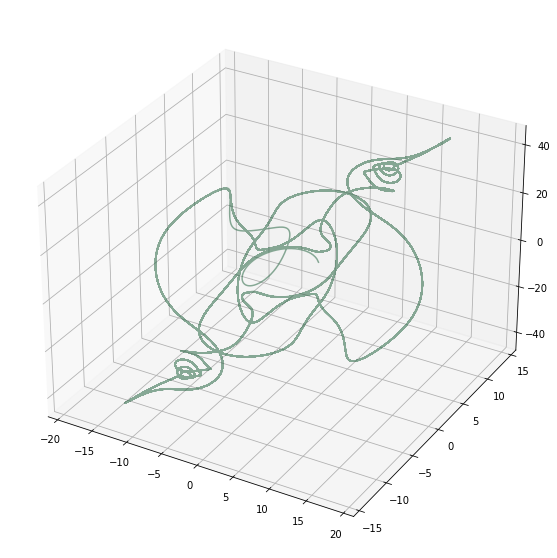

Fourier Norm:  1527.9753397422783


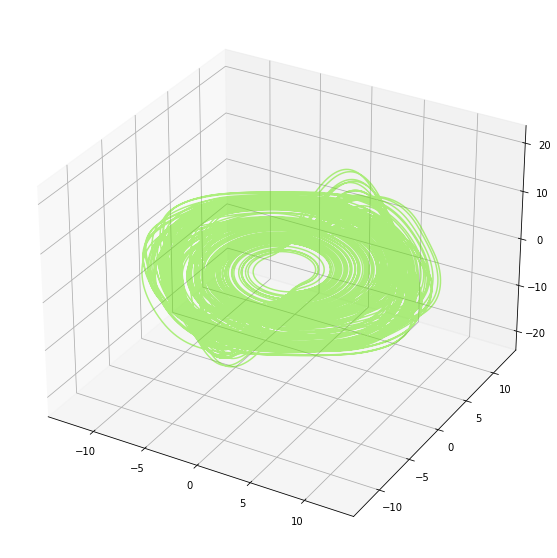

Fourier Norm:  631.0298997755355


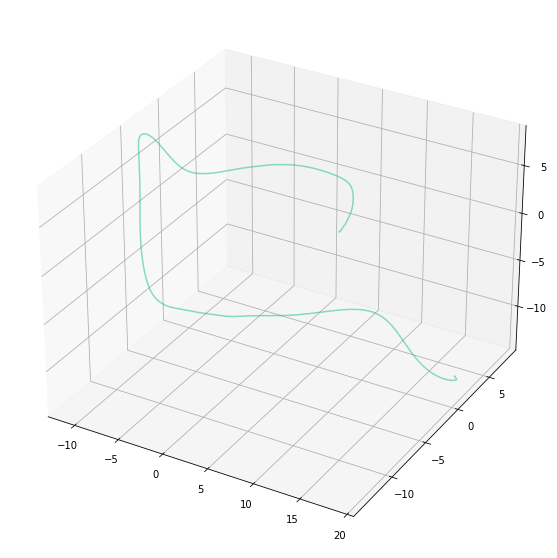

Fourier Norm:  157.86274392126123


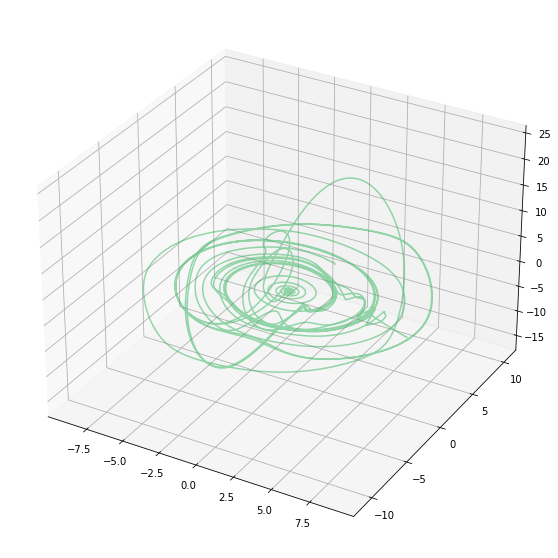

Fourier Norm:  172.35380312495354


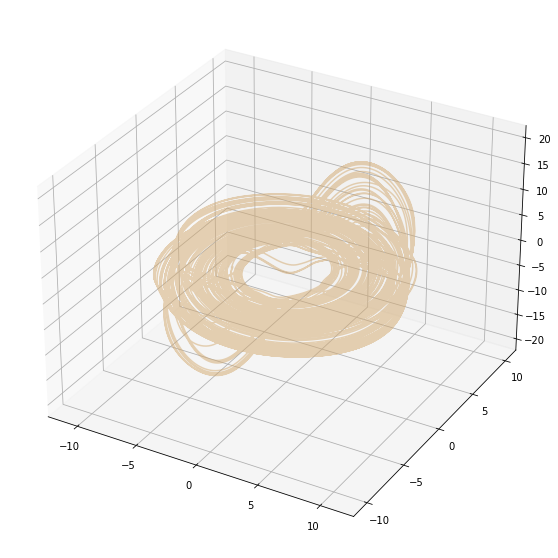

Fourier Norm:  504.5809657356436


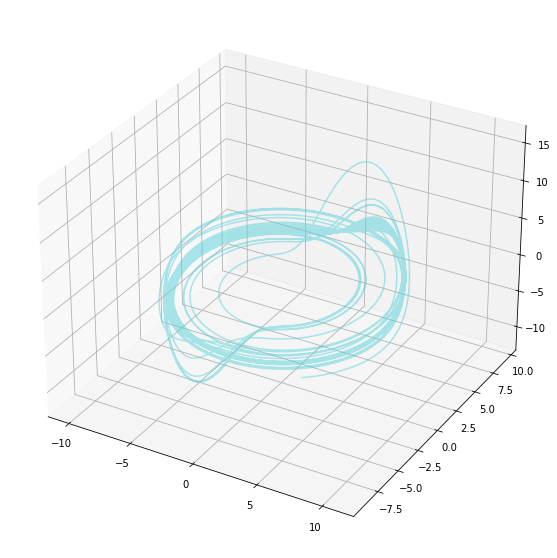

Fourier Norm:  555.7700207580561


In [21]:
for i in range(10):
    t, U = rc.orbit("rossler", duration=50, trim=True)
    xf0, Uf0 = orbit_fft(t, U)
    rcomp = rc.ResComp(**PRMS3)
    rcomp.train(t, U)
    u0 = U[0,:] + np.random.randn(3)*1e-4
    ts = np.arange(0, 1000, .01)
    pre = rcomp.predict(ts, u0)
    rc.plot3d(pre)
    xf0, Uf0 = orbit_fft(t, pre)
    print("Fourier Norm: ", fouriernorm(xf0, Uf0, xf, meanUf, order=2))